# Spiral classification

Given the x-y coordinates of 2D points, classify them into one of three possible spiral branches that they belong to.

Objectives:
 - Build and train a PyTorch MLP model from scratch to classify the points to a high accuracy
 - Visualize how the points are transformed akin to: https://youtu.be/EyKiYVwrdjE?si=JiAKShLumRxbFWXA&t=1002

In [1]:
import torch
from torch import nn, optim

In [2]:
import fastbook
from fastbook import *

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
device

device(type='cuda', index=0)

## Create data

In [5]:
seed = 12345
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
K = 3     # num_classes

In [6]:
# Generate spirals

t = torch.linspace(0, 1, N)
a = 0.8 * t + 0.2  # amplitude 0.2 → 1.0
X = list()
y = list()
for k in range(K):
    θ = (2 * t + k) * 2 * torch.pi / K + 0.2 * torch.randn(N)
    X.append(torch.stack((a * θ.sin(), a * θ.cos()), dim=1))
    y.append(torch.zeros(N, dtype=torch.long).fill_(k))
X = torch.cat(X)
y = torch.cat(y)

In [7]:
X.shape, y.shape

(torch.Size([3000, 2]), torch.Size([3000]))

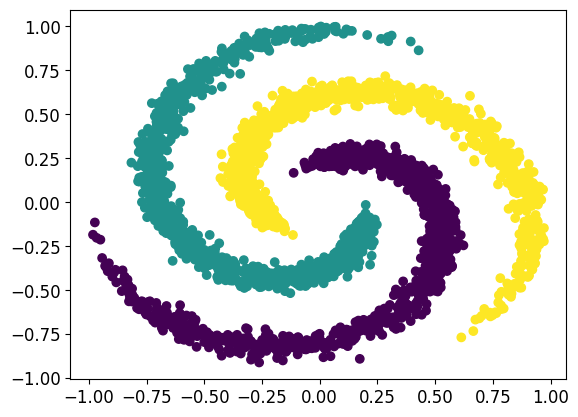

In [10]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()